In [42]:
# Quick hack to import chemspace
import sys
sys.path.append("..")

import chemspace as cs

import numpy as np
import pandas as pd

In [43]:
names, smiless, descriptions = cs.download_compounds(1,2)#(2244-5, 2244+5)

Downloaded compound 1
Downloaded compound 2


In [45]:
def generate_df(start_cid, end_cid, path=None):
    if path:
        old_df = pd.read_csv(path)
    names, smiless, descriptions = cs.download_compounds(start_cid, end_cid)
    df = pd.DataFrame({"Name": names, "SMILES": smiless, "Description": descriptions})
    df = df[df['Description'] != 'No description available.']
    df['xyz'] = df['SMILES'].apply(lambda x: cs.get_3D_representation(x, representation='xyz'))
    df['zmat'] = df['SMILES'].apply(lambda x: cs.get_zmat(x))
    if path:
        df = pd.concat([old_df, df])
        df = df.drop_duplicates(subset=['SMILES'])
    return df

#2000
df = generate_df(2000, 5000, '../chemspace/Dataset/Data/PubChem.csv')

Downloaded compound 2000
Downloaded compound 2001
Downloaded compound 2002
Downloaded compound 2003
Downloaded compound 2004
Downloaded compound 2005
Downloaded compound 2006
Downloaded compound 2007
Downloaded compound 2008
Downloaded compound 2009
Downloaded compound 2010
Downloaded compound 2011
Downloaded compound 2012
Downloaded compound 2013
Downloaded compound 2014
Downloaded compound 2015
Downloaded compound 2016
Downloaded compound 2017
Downloaded compound 2018
Downloaded compound 2019
Downloaded compound 2020
Downloaded compound 2021
Downloaded compound 2022
Downloaded compound 2023
Downloaded compound 2024
Downloaded compound 2025
Downloaded compound 2026
Downloaded compound 2027
Downloaded compound 2028
Downloaded compound 2029
Downloaded compound 2030
Downloaded compound 2031
Downloaded compound 2032
Downloaded compound 2033
Downloaded compound 2034
Downloaded compound 2035
Downloaded compound 2036
Downloaded compound 2037
Downloaded compound 2038
Downloaded compound 2039


In [46]:
df.to_csv('../chemspace/Dataset/Data/PubChem.csv', index=False)

<Axes: xlabel='Description', ylabel='Count'>

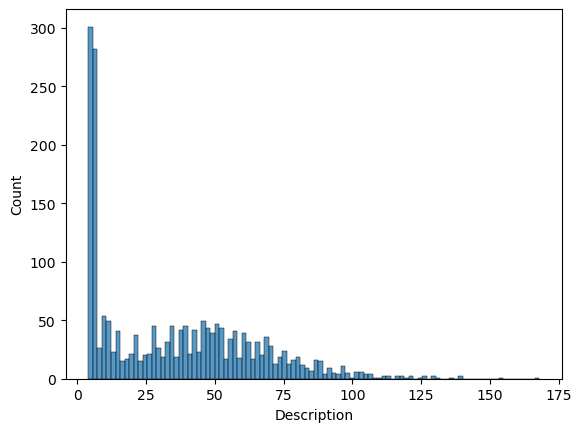

In [47]:
import seaborn as sns
df = pd.read_csv('../chemspace/Dataset/Data/PubChem.csv')
sns.histplot(df['Description'].apply(lambda x: len(x.split())), bins=100)

# Old tests

In [77]:
smls=[
    'CC(C)C1=CC=C(C=C1)C(C)C',
    'CC(C)C1=CC=C(C=C1)C(C)C',
    'CC(C)C1=CC=C(C=C1)C(C)C',
    'CC(C)C1=CC=C(C=C1)C(C)C',
    'CC(C)C1=CC=C(C=C1)C(C)C',
]

## Using OpenBabel

In [103]:
# load smls in a pandas df
df = pd.DataFrame(smls, columns=['smiles'])

In [104]:
m=pybel.readstring('smi', smls[0])
m.OBMol.AddHydrogens()
m.make3D()

conv = openbabel.OBConversion()
conv.SetOutFormat("gzmat")

print(conv.WriteString(m.OBMol))

!Put Keywords Here, check Charge and Multiplicity.
#

 

0  1
C
C  1  r2
C  2  r3  1  a3
C  2  r4  1  a4  3  d4
C  4  r5  2  a5  1  d5
C  5  r6  4  a6  2  d6
C  6  r7  5  a7  4  d7
C  7  r8  6  a8  5  d8
C  8  r9  7  a9  6  d9
C  7  r10  6  a10  5  d10
C  10  r11  7  a11  6  d11
C  10  r12  7  a12  6  d12
H  1  r13  2  a13  3  d13
H  1  r14  2  a14  3  d14
H  1  r15  2  a15  3  d15
H  2  r16  1  a16  3  d16
H  3  r17  2  a17  1  d17
H  3  r18  2  a18  1  d18
H  3  r19  2  a19  1  d19
H  5  r20  4  a20  2  d20
H  6  r21  5  a21  4  d21
H  8  r22  7  a22  6  d22
H  9  r23  8  a23  7  d23
H  10  r24  7  a24  6  d24
H  11  r25  10  a25  7  d25
H  11  r26  10  a26  7  d26
H  11  r27  10  a27  7  d27
H  12  r28  10  a28  7  d28
H  12  r29  10  a29  7  d29
H  12  r30  10  a30  7  d30
Variables:
r2= 1.5349
r3= 1.5340
a3= 108.69
r4= 1.5202
a4= 113.55
d4= 122.06
r5= 1.4007
a5= 121.45
d5= 355.28
r6= 1.3868
a6= 120.65
d6= 186.77
r7= 1.3943
a7= 120.95
d7= 355.76
r8= 1.4006
a8= 119.01
d8=   2.74
r9=

In [105]:
conv = openbabel.OBConversion()
conv.SetOutFormat("gzmat")

df['mol'] = df['smiles'].apply(lambda x: pybel.readstring('smi', x))

#addH and make3D change the mol object and return None. So we need to use a dummy variable to get the return
_ = df['mol'].apply(lambda x: x.OBMol.AddHydrogens())
_ = df['mol'].apply(lambda x: x.make3D())

# Compute xyz. Also accept pdb, sdf and gzmat
df['xyz'] = df['mol'].apply(lambda x: conv.WriteString(x.OBMol))
df

,smiles,mol,xyz
0,CC(C)C1=CC=C(C=C1)C(C)C,CC(C)c1ccc(cc1)C(C)C\t\n,"!Put Keywords Here, check Charge and Multiplic..."
1,CC(C)C1=CC=C(C=C1)C(C)C,CC(C)c1ccc(cc1)C(C)C\t\n,"!Put Keywords Here, check Charge and Multiplic..."
2,CC(C)C1=CC=C(C=C1)C(C)C,CC(C)c1ccc(cc1)C(C)C\t\n,"!Put Keywords Here, check Charge and Multiplic..."
3,CC(C)C1=CC=C(C=C1)C(C)C,CC(C)c1ccc(cc1)C(C)C\t\n,"!Put Keywords Here, check Charge and Multiplic..."
4,CC(C)C1=CC=C(C=C1)C(C)C,CC(C)c1ccc(cc1)C(C)C\t\n,"!Put Keywords Here, check Charge and Multiplic..."


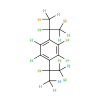

In [106]:
# use openbabel to convert smiles to 3D coordinates

sml=smls[0]
mol = pybel.readstring('smi', sml)
mol.OBMol.AddHydrogens()
mol.make3D()
mol.write('sdf', 'obabel.sdf', overwrite=True)
mol.write('pdb', 'obabel.pdb', overwrite=True)
mol.write('xyz', 'obabel.xyz', overwrite=True)
mol.write('gzmat', 'obabel.zmat', overwrite=True)
mol

### compacting the gzmat

In [ ]:
def replace_variables_in_zmatrix(gzmat):
    lines = gzmat.split('\n')

    variables = {}
    for line in lines:
        if "Variables:" in line:
            # Start of variables section
            index = lines.index(line)
            for variable_line in lines[index+1:]:
                if not variable_line:
                    continue
                var_name, var_value = variable_line.split('=')
                variables[var_name.strip()] = var_value.strip()

    new_lines = []
    for line in lines:
        if "Variables:" in line:
            # Start of variables section, end of file rewrite
            break
        for var_name, var_value in variables.items():
            line = line.replace(var_name, var_value)
        new_lines.append(line)
    return '\n'.join(new_lines)

print(df['xyz'][0])
print(replace_variables_in_zmatrix(df['xyz'][0]))

In [100]:
def replace_variables_in_zmatrix(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()

    variables = {}
    for line in lines:
        if "Variables:" in line:
            # Start of variables section
            index = lines.index(line)
            for variable_line in lines[index+1:]:
                if not variable_line:
                    continue
                var_name, var_value = variable_line[:-1].split('=')
                variables[var_name.strip()] = var_value.strip()

    with open(filename, 'w') as file:
        for line in lines:
            if "Variables:" in line:
                # Start of variables section, end of file rewrite
                break
            for var_name, var_value in variables.items():
                line = line.replace(var_name, var_value)
            file.write(line)

replace_variables_in_zmatrix("obabel.zmat")

## Using RDKit

In [63]:
# load smls in a pandas df
df = pd.DataFrame(smls, columns=['smiles'])

In [101]:
m = Chem.MolFromSmiles(smls[0])
m = Chem.AddHs(m)
AllChem.EmbedMolecule(m)
AllChem.MMFFOptimizeMolecule(m)

# confs = AllChem.EmbedMultipleConfs(m, numConfs=1)
# conf = m.GetConformer(0)

Chem.MolToPDBBlock(m)

'HETATM    1  C1  UNL     1      -3.662   0.808   0.359  1.00  0.00           C  \nHETATM    2  C2  UNL     1      -2.880  -0.492   0.152  1.00  0.00           C  \nHETATM    3  C3  UNL     1      -3.438  -1.280  -1.036  1.00  0.00           C  \nHETATM    4  C4  UNL     1      -1.393  -0.231  -0.000  1.00  0.00           C  \nHETATM    5  C5  UNL     1      -0.493  -0.759   0.934  1.00  0.00           C  \nHETATM    6  C6  UNL     1       0.882  -0.531   0.814  1.00  0.00           C  \nHETATM    7  C7  UNL     1       1.393   0.231  -0.245  1.00  0.00           C  \nHETATM    8  C8  UNL     1       0.493   0.759  -1.180  1.00  0.00           C  \nHETATM    9  C9  UNL     1      -0.882   0.531  -1.059  1.00  0.00           C  \nHETATM   10  C10 UNL     1       2.880   0.492  -0.397  1.00  0.00           C  \nHETATM   11  C11 UNL     1       3.662  -0.808  -0.604  1.00  0.00           C  \nHETATM   12  C12 UNL     1       3.438   1.280   0.791  1.00  0.00           C  \nHETATM   13  H1

In [66]:
df['mol'] = df['smiles'].apply(lambda x: Chem.MolFromSmiles(x))
df['mol'] = df['mol'].apply(lambda x: Chem.AddHs(x))
_ = df['mol'].apply(lambda x: AllChem.EmbedMolecule(x))

# Compute xyz. Also support MolToPDBBlock. Writing sdf is a little different
df['xyz'] = df['mol'].apply(lambda x: Chem.MolToXYZBlock(x))
df

,smiles,mol,xyz
0,CC(C)C1=CC=C(C=C1)C(C)C,<rdkit.Chem.rdchem.Mol object at 0x16417e3b0>,30\n\nC -3.576058 -0.267986 -0.818088\...
1,CC(C)C1=CC=C(C=C1)C(C)C,<rdkit.Chem.rdchem.Mol object at 0x16417e340>,30\n\nC -3.268564 -1.109884 -1.196391\...
2,CC(C)C1=CC=C(C=C1)C(C)C,<rdkit.Chem.rdchem.Mol object at 0x16417e2d0>,30\n\nC 3.294086 1.170645 -0.739856\...
3,CC(C)C1=CC=C(C=C1)C(C)C,<rdkit.Chem.rdchem.Mol object at 0x16417e260>,30\n\nC 3.263697 1.483787 0.576441\...
4,CC(C)C1=CC=C(C=C1)C(C)C,<rdkit.Chem.rdchem.Mol object at 0x16417e0a0>,30\n\nC 3.369477 1.335050 -0.337874\...


In [102]:
# SDWriter('-') writes to stdout
with Chem.SDWriter('rdkit.sdf') as w:
    for cid in range(m.GetNumConformers()):
        print(cid)
        m.SetProp('ID', f'{cid}')
        w.write(m, confId=cid)

Chem.MolToPDBFile(m, 'rdkit.pdb')
Chem.MolToXYZFile(m, 'rdkit.xyz')


0
